In [1]:
import numpy as np
import pandas as pd
from skmultilearn.dataset import load_dataset
import sklearn.metrics as metrics
import scipy.sparse as sparse
import seaborn as sns
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

In [4]:
X_train, y_train, feature_names, label_names = load_dataset("birds", 'train')
X_test, y_test, _, _ = load_dataset("birds", 'test')

birds:train - exists, not redownloading
birds:test - exists, not redownloading


In [5]:
label_kind=np.unique(y_train.todense(),axis=0)
np.shape(label_kind)

(89, 19)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.cluster import MatrixLabelSpaceClusterer
from skmultilearn.ensemble import LabelSpacePartitioningClassifier

# construct base forest classifier
base_classifier = RandomForestClassifier(n_estimators=1030)

# setup problem transformation approach with sparse matrices for random forest
problem_transform_classifier = LabelPowerset(classifier=base_classifier,
    require_dense=[False, False])

# setup the clusterer
clusterer = MatrixLabelSpaceClusterer(clusterer=KMeans(n_clusters=3))

# setup the ensemble metaclassifier
classifier = LabelSpacePartitioningClassifier(problem_transform_classifier, clusterer)

# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)

/Users/phl/Library/Python/3.8/lib/python/site-packages/skmultilearn/cluster/matrix.py:81: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(_membership_to_list_of_communities(result, 1 + max(result)))


In [7]:
def trans_result(y_testing, pred):
    col_count = y_testing.shape[1]
    y_test_df = pd.DataFrame(y_testing.todense(),columns=[label_names[x][0] for x in range(col_count)])
    pred_df = pd.DataFrame(pred.todense(),columns=[label_names[x][0] for x in range(col_count)])
    z=[]
    for col in y_test_df.columns:
        z.append({"name": col,
              "precision": metrics.precision_score(y_test_df[col], pred_df[col]),
              "recall": metrics.recall_score(y_test_df[col], pred_df[col]),
              "accuracy": metrics.accuracy_score(y_test_df[col], pred_df[col]),
              "f1": metrics.f1_score(y_test_df[col], pred_df[col])})
    return pd.DataFrame(z)

In [8]:
result_df = trans_result(y_test,predictions)
result_df

/Users/phl/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,name,precision,recall,accuracy,f1
0,Brown Creeper,1.000000,0.285714,0.984520,0.444444
1,Pacific Wren,1.000000,0.391304,0.913313,0.562500
2,Pacific-slope Flycatcher,0.285714,0.080000,0.913313,0.125000
3,Red-breasted Nuthatch,0.000000,0.000000,0.984520,0.000000
4,Dark-eyed Junco,0.500000,0.142857,0.978328,0.222222
5,Olive-sided Flycatcher,0.571429,0.666667,0.984520,0.615385
6,Hermit Thrush,0.666667,0.272727,0.941176,0.387097
7,Chestnut-backed Chickadee,0.500000,0.111111,0.944272,0.181818
8,Varied Thrush,0.904762,0.593750,0.953560,0.716981
9,Hermit Warbler,1.000000,0.250000,0.934985,0.400000


In [15]:
from sklearn.cluster import KMeans

data_set = pd.DataFrame(y_train.todense(),columns=[label_names[x][0] for x in range(y_train.shape[1])])

estimator = KMeans(n_clusters=4)
estimator.fit(data_set)

KMeans(n_clusters=4)

In [16]:
from sklearn.manifold import TSNE

t_sne = TSNE()
t_sne.fit(data_set)
t_sne = pd.DataFrame(t_sne.embedding_, index=data_set.index)
t_sne.columns=["v1","v2"]
t_sne["group"]=estimator.labels_

<AxesSubplot:xlabel='v1', ylabel='v2'>

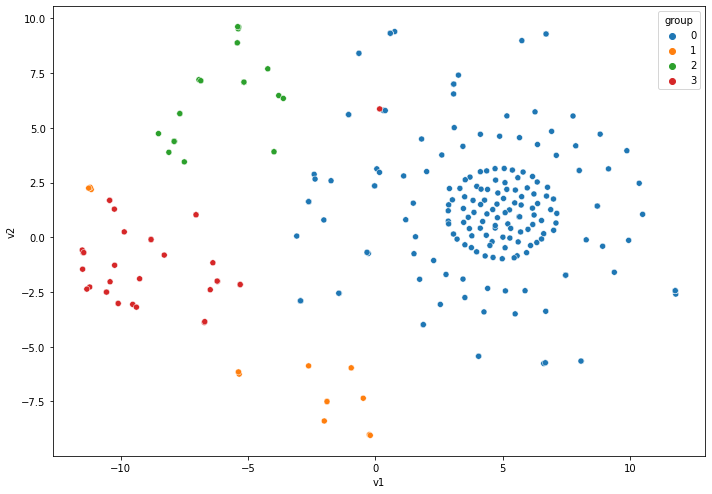

In [17]:
sns.scatterplot(data=t_sne, x="v1", y="v2",hue="group",palette="tab10")

提供 label space cluster 信息